### Sk-learn Clustering & PCA Project! **[ANSWER SHEET]**

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [458]:
# Get used to these imports!
#----------------------------------------------------------------#
#To install: pip install numpy
import numpy as np 
#To install: pip install matplotlib
import matplotlib.pyplot as plt 
#To install: pip install sklearn
import sklearn 
#To install: pip install torchvision
import torchvision as tv
#----------------------------------------------------------------#


The concept of data "shape"
- [Data Shape in Numpy](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [459]:
# Below is the data and labels in two separate variables, find their shapes (this will make it easier to understand what you are working with)
#----------------------------------------------------------------#
all_data = tv.datasets.MNIST('./data', download=True)

data = all_data.data.numpy()
labels = all_data.targets.numpy()
#----------------------------------------------------------------#
## TODO: Find and print the shapes of data and labels
# Print the shape of data and the shape of labels

#! Answer
print(f"Data Shape:{data.shape}") # = (60000, 28, 28)
print(f"Label Shape: {labels.shape}") # = (60000,)

Data Shape:(60000, 28, 28)
Label Shape: (60000,)


Splitting data into Train/Test
- [Importance of Train/Test](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)
- [Slicing Tutorial](https://www.learnbyexample.org/python-list-slicing/)

In [460]:
# Goal: Split the data AND labels into train and test sets. 
# In reality, we won't be "testing" anything as these are unsupervised algorithms. This is good practice anyways!

## TODO: Create the following variables
# train_data: 1000 training data from the start of the all_data array
# train_labels: 1000 labels associated w/ training data

# test_data: 500 test data from the end of the all_data array
# test_labels = 500 test labels associated w/ test data

#! Answer
train_data = data[:1000]
train_labels = labels[:1000]

test_data = data[59500:]
test_labels = labels[59500:]

#----------------------------------------------------------------#
print(f"Train Data Shape:{train_data.shape}") # = (1000, 28, 28)
print(f"Train Label Shape: {train_labels.shape}") # = (1000,)

print(f"Test Data Shape:{test_data.shape}") # = (500, 28, 28)
print(f"Test Label Shape: {test_labels.shape}") # = (500,)
#----------------------------------------------------------------#

Train Data Shape:(1000, 28, 28)
Train Label Shape: (1000,)
Test Data Shape:(500, 28, 28)
Test Label Shape: (500,)


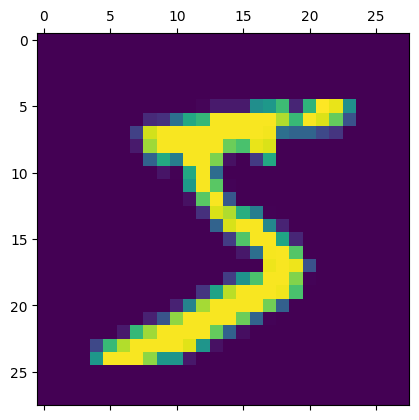

Associated Label: 5


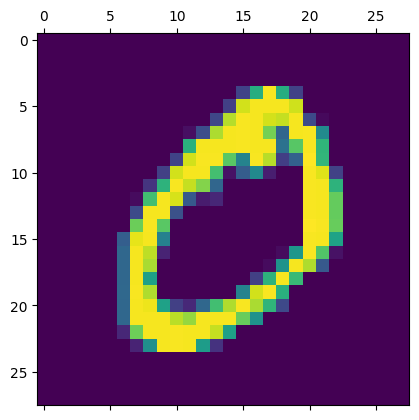

Associated Label: 0


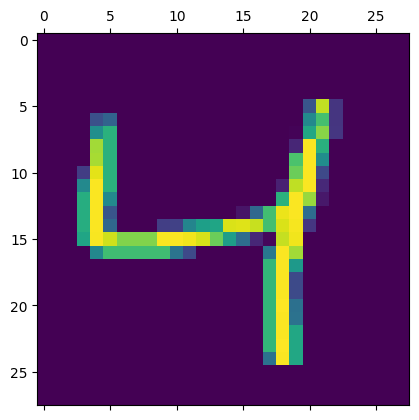

Associated Label: 4


In [461]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    to_reshape = train_data[i]
    plt.matshow(to_reshape.reshape(28, 28))
    plt.show()
    print(f"Associated Label: {train_labels[i]}")
#----------------------------------------------------------------#

Now that you have the data, and understand its form, find out how to properly use PCA!
- [Reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

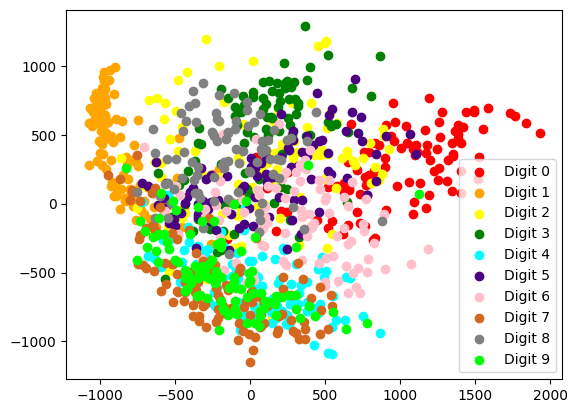

In [462]:
from sklearn.decomposition import PCA

# Goal: Reduce the train data using PCA and visualize it

## TODO: Create the following variables and execute the following code
# reduced_data: PCA'ed training data
"""
Tips:
- You will need to reshape the data before passing it into PCA. PCA takes data in the shape (X, Z). i.e, it must 2-d. Your data is currently (X, Y, Y)
    - Think about how 2-d images can be vectorized, and how to maintain the X throughout the reshape
- The important method for PCA is fit_transform
    - Parameter n_components is the amount of dimensions PCA reduces to
- Be sure to save the PCA'ed data into the proper variable name so it fits in with the provided puzzle pieces
"""

#! Answer
train_data = train_data.reshape(train_data.shape[0], 784)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_data)

#----------------------------------------------------------------#
rd = reduced_data.transpose()
colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink", "chocolate", "grey", "lime"] 
fig, ax = plt.subplots()
for g in np.unique(train_labels):
    idxs = np.where(train_labels == g)
    ax.scatter(rd[0][idxs], rd[1][idxs], color=colors[g], label=f"Digit {g}")
ax.legend()
#----------------------------------------------------------------#


Uh oh... Did PCA not work? Take a look at the data. A lot of numbers are meshing together, but ones that look similar are close (like 2 and 3), 
and those that don't look similar are not very close (like 0 and 1)

PCA preserves **global structure** of the N-D data, but does not preserve local structure, hence the heavy overlapping. 
We will now use another dimensionality reduction technique (t-SNE) that preserves local structure to see a proper reduction!

Check out t-SNE
- [t-SNE Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

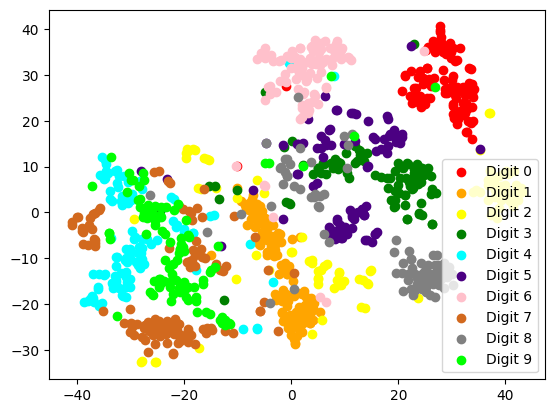

In [463]:
from sklearn.manifold import TSNE

# Goal: Reduce the train data using t-SNE and visualize it

## TODO: Create the following variables and execute the following code
# reduced_data: TSNE'ed training data
"""
Tips:
- You literally just need to copy your code (if it works) from the above code cell and change PCA to TSNE
- Call fit_transform on your new t-SNE object
"""

#! Answer
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(train_data)

#----------------------------------------------------------------#
rd = reduced_data.transpose()
colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink", "chocolate", "grey", "lime"] 
fig, ax = plt.subplots()
for g in np.unique(train_labels):
    idxs = np.where(train_labels == g)
    ax.scatter(rd[0][idxs], rd[1][idxs], color=colors[g], label=f"Digit {g}")
ax.legend()
#----------------------------------------------------------------#

Awesome! These now actually look like some groupings. You may have noticed that we have not applied k-means clustering, yet clusters seem to form. How is this the case? Well an important thing to note is that **k-means clustering does not force groups into clusters, it simply identifies and "colors" clusters it sees**. We will now apply k-means clustering to the dataset to see how well it does.
- [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

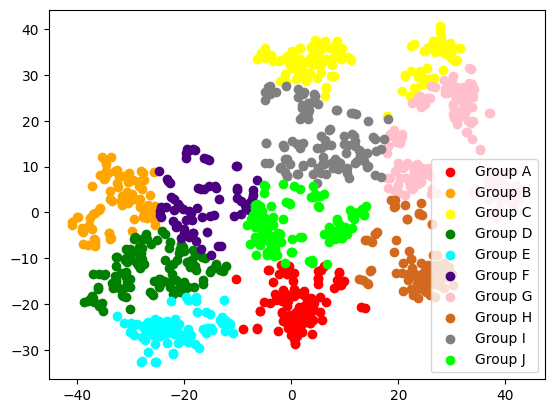

In [464]:
from sklearn.cluster import KMeans

# Goal: Apply kmeans clustering to the above scatterplot

## TODO: Create the following variables and execute the following code
# kmeans: KMeans object with .fit() called on it (reduced training data passed in)
"""
Tips:
- There are 10 digits... How many clusters (n_clusters) do you need?
- Take a look at the "init" parameter and what it does in the documentation
"""

#! Answer
kmeans = KMeans(init="random", n_clusters=10, n_init=1)
kmeans.fit(reduced_data)

#----------------------------------------------------------------#
rd = reduced_data.transpose()
colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink", "chocolate", "grey", "lime"] 
fig, ax = plt.subplots()
for g in np.unique(kmeans.labels_):
    idxs = np.where(kmeans.labels_ == g)
    ax.scatter(rd[0][idxs], rd[1][idxs], color=colors[g], label=f"Group {chr(g+65)}")
ax.legend()

Well, looks like kmeans got a bit confused... certain groups that were overlapping quite a bit are now considered "distinct" groups, leading to some misgrouped digits. It did, however, correctly classify some like 0! 

I hope this project gave you a new appreciation for dimensionality reduction, clustering, **and** their ___limitations___.

Extensions: 
- Try other SK-learn clustering algoritms

### Congratulations on completing the project! Check your results with the image(s) in the `answers` directory and then send this image to your club/channel/mentor!